In [1]:
import meshposition as mp
import utils as utl
import numpy as np
import matplotlib.pyplot as plt
import analyse_utils as atl
import math

mp.init()

====> 'D:\Dev\uwb\server_mesh_position\py_serial\serial_topic_json.py' started logging with level 'Info' @ '2021-07-24 18:15:32.658726'


checking file './config_ryzen.json'
loading:  ./config_ryzen.json


logging in file 'log/serial-2021.07.24.log'
====> 'D:\Dev\uwb\server_mesh_position\py_serial\meshposition.py' started logging with level 'Info' @ '2021-07-24 18:15:32.912247'
uart> device with serial 000760129940 found at COM35
uart> COM35 : is Open


mp>getting config
checking file './config_ryzen.json'
loading:  ./config_ryzen.json
{'Tag': '90A971A3D1A1B648', 'FrontRight': '98501ED22B42EB41', 'FrontLeft': 'E8D81FEE52C283EB', 'RearLeft': 'C24FD51212E905F0', 'Init': '530BE91D3559D690', 'Tester': 'CBC216DC164B1DE8', 'Resp': '1CF6567337562176'}
mp>starting serial
mp>start serial parsing


databases available from https://www.homesmartmesh.com/docs/networks/ultrawideband/#database

In [2]:
node_ids = mp.rf_get_active_short_ids()
print(node_ids)
utl.save_json_timestamp("config",node_ids)

(Init) : (2)/(530BE91D3559D690)
(Resp) : (1)/(1CF6567337562176)
{'Init': {'sid': 2, 'uid': '530BE91D3559D690'}, 'Resp': {'sid': 1, 'uid': '1CF6567337562176'}}


'./test_db/config 2021.07.24 20-15-37.json'

In [6]:
n_init = node_ids["Init"]["sid"]
n_resp = node_ids["Resp"]["sid"]

diag = mp.uwb_ping_diag(n_init,n_resp)
print(diag)
fp = diag["firstPath"]
print(f"first path index = {math.trunc(fp/64)} + {(fp%64)/64}")

{'firstPath': 48028, 'fpAmp1': 4461, 'fpAmp2': 7253, 'fpAmp3': 5891, 'maxGrowthCIR': 2352, 'maxNoise': 630, 'rxPreamCount': 123, 'stdNoise': 28}
first path index = 750 + 0.4375


In [7]:
cir_data = mp.uwb_cir("Resp")
cir_complex = np.frombuffer(cir_data, dtype='i2').astype(np.float32).view(np.complex64)

max = 7048.61767578125


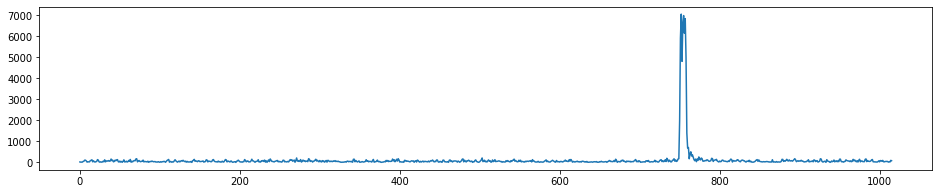

In [8]:
cir_norm = np.absolute(cir_complex)
print(f"max = {np.amax(cir_norm)}")
fig = plt.figure()
plt.plot(cir_norm)
fig.set_size_inches(16,3)

max = 7048.61767578125


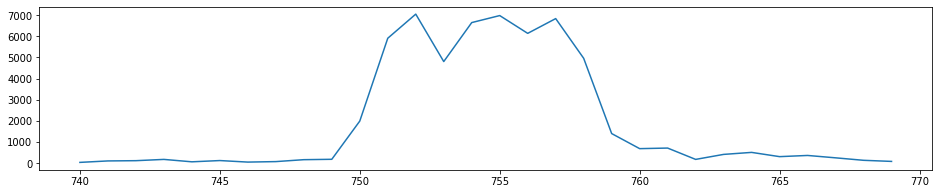

In [16]:
cir_norm = np.absolute(cir_complex)
print(f"max = {np.amax(cir_norm)}")
fig = plt.figure()
start_pulse = 740
end_pulse = 770
plt.plot(range(start_pulse,end_pulse),cir_norm[start_pulse:end_pulse])
fig.set_size_inches(16,3)